In [1]:
import numpy as np 
import random
import pandas as dp
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
df = dp.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
df.head()

,col1,col2,col3,col4,col5,target
0,0.411729,-1.449743,-0.405350,0.130366,0.038771,0
1,-2.742721,-0.803771,-1.376634,2.516534,-1.355833,0
2,-2.416089,-1.072936,-1.587843,2.162366,-1.765835,0
3,0.145818,2.629431,-1.807708,-0.329655,-1.554605,1
4,-2.242776,-1.329138,-1.852245,0.150977,1.025000,0


In [4]:
def row_sample(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [32]:
def col_sample(df,percent):
    col = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[col]
    new_df['target'] = df['target']
    return new_df

In [39]:
col_sample(df,0.4)

C:\Users\M.Muzzamil\AppData\Local\Temp\ipykernel_10816\2041190983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col2,target
0,0.130366,-1.449743,0
1,2.516534,-0.803771,0
2,2.162366,-1.072936,0
3,-0.329655,2.629431,1
4,0.150977,-1.329138,0
...,...,...,...
95,-3.145582,2.384871,1
96,2.464707,-1.256462,0
97,1.007146,0.258699,0
98,-1.036053,-0.209378,0


In [6]:
def random_patches(df,row_percent, col_percent):
    new_df = row_sample(df,row_percent)
    return col_sample(new_df,col_percent)

In [7]:
df1 = row_sample(df,0.2)

In [8]:
df2 = row_sample(df,0.2)

In [9]:
df3 = row_sample(df,0.2)

In [28]:
df3.shape

(20, 6)

In [11]:
dtc1 = DecisionTreeClassifier()
dtc2 = DecisionTreeClassifier()
dtc3 = DecisionTreeClassifier()

In [12]:
dtc1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
dtc2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
dtc3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.875, 'x[1] <= 1.171\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.625, 'x[2] <= -1.979\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'x[2] <= -0.084\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'x[4] <= 0.083\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

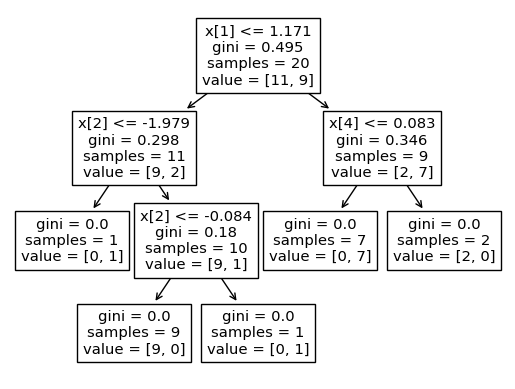

In [15]:
plot_tree(dtc1)

[Text(0.3333333333333333, 0.9166666666666666, 'x[1] <= -0.866\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.75, 'x[0] <= -2.603\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[0] <= 0.153\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.5, 0.4166666666666667, 'x[3] <= 0.679\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6666666666666666, 0.25, 'x[2] <= -0.136\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

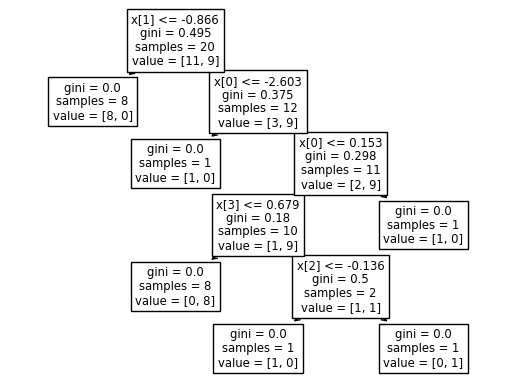

In [16]:
plot_tree(dtc2)

[Text(0.6666666666666666, 0.875, 'x[1] <= 1.466\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.5, 0.625, 'x[2] <= -0.47\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= -3.025\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

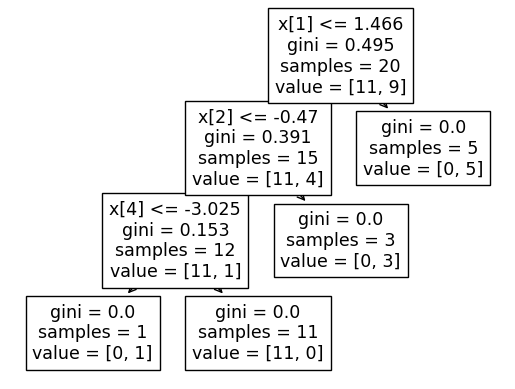

In [17]:
plot_tree(dtc3)

In [18]:
df

,col1,col2,col3,col4,col5,target
0,0.411729,-1.449743,-0.405350,0.130366,0.038771,0
1,-2.742721,-0.803771,-1.376634,2.516534,-1.355833,0
2,-2.416089,-1.072936,-1.587843,2.162366,-1.765835,0
3,0.145818,2.629431,-1.807708,-0.329655,-1.554605,1
4,-2.242776,-1.329138,-1.852245,0.150977,1.025000,0
...,...,...,...,...,...,...
95,-1.006888,2.384871,-1.235173,-3.145582,-1.159119,1
96,-0.885656,-1.256462,-0.303861,2.464707,-2.056309,0
97,-1.455609,0.258699,-0.567884,1.007146,0.418662,0
98,0.271581,-0.209378,-0.803464,-1.036053,-0.921044,0


In [29]:
dtc1.predict(np.array([-1.006888, 2.384871, -1.235173, -3.145582, -1.159119]).reshape(1,5))

C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
dtc2.predict(np.array([-1.006888, 2.384871, -1.235173, -3.145582, -1.159119]).reshape(1,5))

C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
dtc3.predict(np.array([-1.006888, 2.384871, -1.235173, -3.145582, -1.159119]).reshape(1,5))

C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# same logic apply for Function (col_sample, random_patches)
# col_sample = feature_sampling(Random subspaces)  reshape(1,appropriate_cols),df.iloc[:,0:appropriate_cols]
# Random_patches = row_sampling + col_sampling   reshape(1,appropriate_cols),df.iloc[:,0:appropriate_cols]